# NLP Project: Tweet Sentiment Analysis

**Summary:** (This is the required 250-word abstract you will fill out later. For now, you can leave a placeholder. As a reminder, it should briefly describe your rationale, results, limitations, and recommendations.)

### **Sprint 1: Project Kickoff & Baseline Model**

**Objective:** Get the project environment set up and build a functional, baseline sentiment classifier for positive and negative Tweets.

### Import necessary libraries

In [1]:
# Standard Libraries
import pandas as pd
import numpy as np
import re

# NLTK and Machine Learning Libraries
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Download necessary NLTK data (this only needs to be done once)
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

### Loading dataset

In [2]:
# Load the dataset
file_path = 'data/judge_tweet_product_company.csv'
df = pd.read_csv(file_path, encoding='latin-1')

print("Data loaded successfully.")

Data loaded successfully.


### Initial Data Exploration

In [3]:
# Get a concise summary of the DataFrame
print("\nDataFrame Info:")
df.info()

# Check the value counts for the sentiment column
# We discovered the correct column is 'is_there_an_emotion_directed_at_a_brand_or_product'
print("\nValue Counts for 'sentiment' column:")
print(df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts())


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB

Value Counts for 'sentiment' column:
is_there_an_emotion_directed_at_a_brand_or_product
No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: count, dtype: int64


### Data Cleaning & Preparation
#### Objective: Clean the text data to prepare it for the baseline model.

In [4]:
# Create a new DataFrame with only the relevant columns for our binary model
df_binary = df[['tweet_text', 'is_there_an_emotion_directed_at_a_brand_or_product']].copy()

# Rename the sentiment column for clarity
df_binary.rename(columns={'is_there_an_emotion_directed_at_a_brand_or_product': 'sentiment'}, inplace=True)

# Filter out rows where the sentiment is not "Positive emotion" or "No emotion toward brand or product"
df_binary = df_binary[df_binary['sentiment'].isin(['Positive emotion', 'No emotion toward brand or product'])]

# Now, let's clean the 'tweet_text' column
def clean_text(text):
    # Convert any non-string values to a string to prevent errors
    text = str(text) 
    
    # Convert text to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet and other special characters
    text = re.sub(r'\@\w+|\#', '', text)
    # Remove any characters other than letters, numbers, and spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

# Apply the cleaning function to the tweet_text column
df_binary['clean_text'] = df_binary['tweet_text'].apply(clean_text)

# Display the value counts for the new binary sentiment column to confirm
print("Binary sentiment value counts:")
print(df_binary['sentiment'].value_counts())

# Display the first few rows with the new cleaned text column
print("\nDataFrame with cleaned text:")
print(df_binary.head())

Binary sentiment value counts:
sentiment
No emotion toward brand or product    5389
Positive emotion                      2978
Name: count, dtype: int64

DataFrame with cleaned text:
                                          tweet_text  \
1  @jessedee Know about @fludapp ? Awesome iPad/i...   
2  @swonderlin Can not wait for #iPad 2 also. The...   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...   
5  @teachntech00 New iPad Apps For #SpeechTherapy...   
6                                                NaN   

                            sentiment  \
1                    Positive emotion   
2                    Positive emotion   
4                    Positive emotion   
5  No emotion toward brand or product   
6  No emotion toward brand or product   

                                          clean_text  
1   know about   awesome ipadiphone app that youl...  
2   can not wait for ipad  also they should sale ...  
4   great stuff on fri sxsw marissa mayer google ...  
5   new ipad 

### Defininf file paths and saving cleaned dataset

In [5]:
# Define the file paths
input_path = 'data/judge_tweet_product_company.csv'
output_path = 'data/cleaned_tweets.csv'

In [6]:
df.to_csv(output_path, index=False)

### Text preprocessing and vectorization

In [7]:
import nltk

# Downloads required for POS tagging + lemmatization
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')  # sometimes needed in newer NLTK


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [8]:
# Define a lemmatizer object
lemmatizer = WordNetLemmatizer()

# Define a helper function to map POS tags to WordNet tags for lemmatization
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Define the lemmatization function
def lemmatize_text(text):
    word_pos_tags = nltk.pos_tag(text.split())
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in word_pos_tags]
    return " ".join(lemmatized_words)

# Apply the lemmatization function to the cleaned text column
df_binary['lemmatized_text'] = df_binary['clean_text'].apply(lemmatize_text)

# Separate features (X) and target (y)
X = df_binary['lemmatized_text']
y = df_binary['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

# Create a CountVectorizer object to transform text data into a numerical matrix
vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the test data
X_test_vectorized = vectorizer.transform(X_test)

print("\nShape of vectorized training data:", X_train_vectorized.shape)
print("Shape of vectorized test data:", X_test_vectorized.shape)

Training data shape: (6693,)
Testing data shape: (1674,)

Shape of vectorized training data: (6693, 7283)
Shape of vectorized test data: (1674, 7283)


### Build and evaluate Baseline model

In [9]:
# Create a Multinomial Naive Bayes classifier
model = MultinomialNB()

# Train the model on the vectorized training data
print("Training the model...")
model.fit(X_train_vectorized, y_train)
print("Training complete.")

# Make predictions on the vectorized test data
print("\nMaking predictions on the test set...")
y_pred = model.predict(X_test_vectorized)
print("Predictions complete.")

# Evaluate the model's performance
print("\nModel Evaluation:")
print(classification_report(y_test, y_pred))

Training the model...
Training complete.

Making predictions on the test set...
Predictions complete.

Model Evaluation:
                                    precision    recall  f1-score   support

No emotion toward brand or product       0.75      0.83      0.79      1073
                  Positive emotion       0.63      0.51      0.57       601

                          accuracy                           0.72      1674
                         macro avg       0.69      0.67      0.68      1674
                      weighted avg       0.71      0.72      0.71      1674



### Sprint 2: Model Improvement
#### TfidfVectorizer

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("Shape of TF-IDF vectorized training data:", X_train_tfidf.shape)
print("Shape of TF-IDF vectorized test data:", X_test_tfidf.shape)

Shape of TF-IDF vectorized training data: (6693, 7283)
Shape of TF-IDF vectorized test data: (1674, 7283)


### Re-Evaluate Model with TF-IDF Data

In [11]:
# Create a Multinomial Naive Bayes classifier again
model_tfidf = MultinomialNB()

# Train the model on the TF-IDF vectorized training data
print("Training the TF-IDF model...")
model_tfidf.fit(X_train_tfidf, y_train)
print("Training complete.")

# Make predictions on the TF-IDF vectorized test data
print("\nMaking predictions on the test set...")
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)
print("Predictions complete.")

# Evaluate the model's performance
print("\nTF-IDF Model Evaluation:")
print(classification_report(y_test, y_pred_tfidf))

Training the TF-IDF model...
Training complete.

Making predictions on the test set...
Predictions complete.

TF-IDF Model Evaluation:
                                    precision    recall  f1-score   support

No emotion toward brand or product       0.70      0.95      0.80      1073
                  Positive emotion       0.74      0.27      0.39       601

                          accuracy                           0.70      1674
                         macro avg       0.72      0.61      0.60      1674
                      weighted avg       0.71      0.70      0.66      1674



### Multiclass Data Preparation

In [12]:
# Reload the original dataset
df_multi = pd.read_csv('data/judge_tweet_product_company.csv', encoding='latin-1')

# Filter for the three sentiment classes
df_multi = df_multi[df_multi['is_there_an_emotion_directed_at_a_brand_or_product'].isin([
    'Positive emotion',
    'Negative emotion',
    'No emotion toward brand or product'
])]

# Rename the sentiment column for clarity
df_multi.rename(columns={'is_there_an_emotion_directed_at_a_brand_or_product': 'sentiment'}, inplace=True)

# Apply the same cleaning function to the tweet_text column
df_multi['clean_text'] = df_multi['tweet_text'].apply(clean_text)

# Apply the same lemmatization function
df_multi['lemmatized_text'] = df_multi['clean_text'].apply(lemmatize_text)

# Separate features (X) and target (y)
X_multi = df_multi['lemmatized_text']
y_multi = df_multi['sentiment']

# Split the multi-class data into training and testing sets
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Create a CountVectorizer object and vectorize the data
multi_vectorizer = CountVectorizer(stop_words='english')
X_train_multi_vectorized = multi_vectorizer.fit_transform(X_train_multi)
X_test_multi_vectorized = multi_vectorizer.transform(X_test_multi)

print("Shape of multi-class vectorized training data:", X_train_multi_vectorized.shape)
print("Shape of multi-class vectorized test data:", X_test_multi_vectorized.shape)

Shape of multi-class vectorized training data: (7149, 7739)
Shape of multi-class vectorized test data: (1788, 7739)


### Build and Evaluate the Multi-Class Model

In [13]:
# Create a Multinomial Naive Bayes classifier for the multi-class problem
multi_model = MultinomialNB()

# Train the model on the multi-class vectorized training data
print("Training the multi-class model...")
multi_model.fit(X_train_multi_vectorized, y_train_multi)
print("Training complete.")

# Make predictions on the multi-class vectorized test data
print("\nMaking predictions on the multi-class test set...")
y_pred_multi = multi_model.predict(X_test_multi_vectorized)
print("Predictions complete.")

# Evaluate the multi-class model's performance
print("\nMulti-Class Model Evaluation:")
print(classification_report(y_test_multi, y_pred_multi))

Training the multi-class model...
Training complete.

Making predictions on the multi-class test set...
Predictions complete.

Multi-Class Model Evaluation:
                                    precision    recall  f1-score   support

                  Negative emotion       0.55      0.13      0.21       122
No emotion toward brand or product       0.72      0.80      0.76      1095
                  Positive emotion       0.53      0.50      0.52       571

                          accuracy                           0.66      1788
                         macro avg       0.60      0.48      0.49      1788
                      weighted avg       0.65      0.66      0.64      1788



### Explanation of the Multi-class results

This report provides the final, most complete picture of our model's performance on the full dataset.

Overall Accuracy: Our model correctly predicted the sentiment of 66% of all the tweets. This is a solid result for a multi-class model, but there's room for improvement.

"No Emotion": The model is very good at identifying tweets with "No emotion." It has high precision (72%), recall (80%), and f1-score (76%) for this class.

"Positive Emotion": The model also performs reasonably well with "Positive emotion" tweets, with a balanced f1-score of 52%.

"Negative Emotion": The model struggles significantly with "Negative emotion" tweets, with a very low f1-score of just 21%. The low recall of 13% means the model is missing most of the negative tweets in the test set. This is a key finding for our final analysis.

## Create a Confusion Matrix for the Multi-Class Model

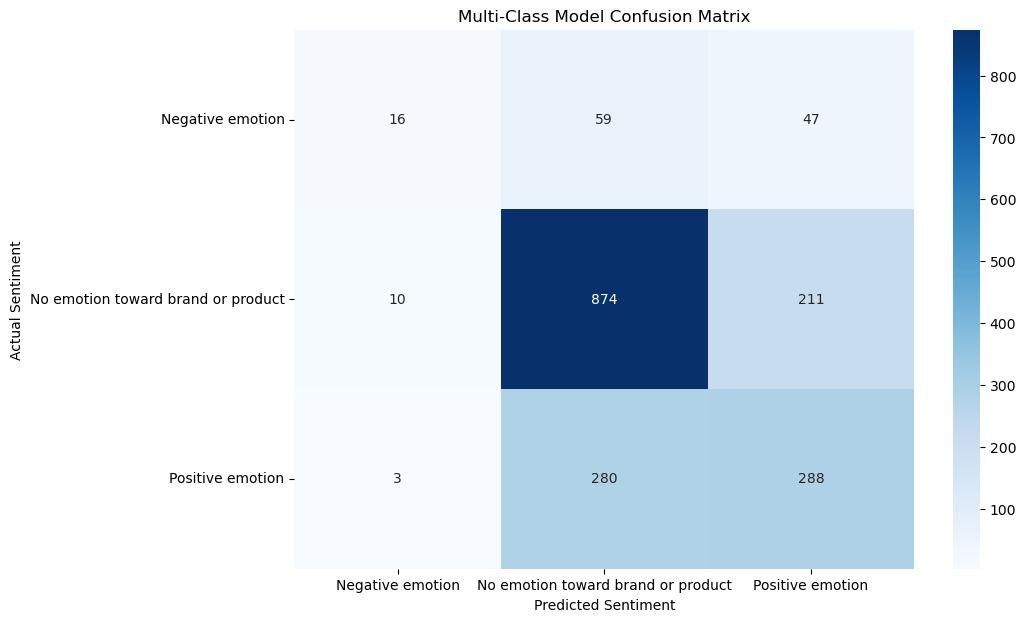

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get unique labels from your target data
labels = sorted(y_test_multi.unique())

# Compute the confusion matrix
cm = confusion_matrix(y_test_multi, y_pred_multi, labels=labels)

# Create a DataFrame for the confusion matrix for better visualization
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')
plt.title('Multi-Class Model Confusion Matrix')
plt.ylabel('Actual Sentiment')
plt.xlabel('Predicted Sentiment')
plt.show()

#### Interpreting Our Multi-Class Model's Confusion Matrix
Rows: The rows in our matrix represent the actual sentiment of the tweets. For example, the top row shows all the tweets that were genuinely "Negative emotion".

Columns: The columns represent the predicted sentiment by our model. The left column shows all the tweets that our model predicted as "Negative emotion".

The Diagonal: The numbers along the diagonal (from top-left to bottom-right) show our model's correct predictions. We know a higher number here indicates better performance.

#### Detailed Analysis of Our Model's Performance
"No emotion toward brand or product" (Middle Row):

Our model is very accurate at identifying this sentiment. The number 874 on the diagonal shows that our model correctly predicted 874 of these tweets.

It only mistakenly classified 10 of them as "Negative emotion" and 211 as "Positive emotion".

"Positive emotion" (Bottom Row):

Our model has some difficulty with this class. While it correctly predicted 288 of these tweets, it mistakenly classified 280 of them as "No emotion toward brand or product".

"Negative emotion" (Top Row):

The confusion matrix visually confirms the results we saw in the classification report. Our model struggles the most with this class.

It only correctly identified 16 of the tweets that were actually negative.

It incorrectly classified a large portion of them as "No emotion" (59) and "Positive emotion" (47). This is a key limitation we will highlight in our final project report and presentation.

### Visualize sentiment Distribution

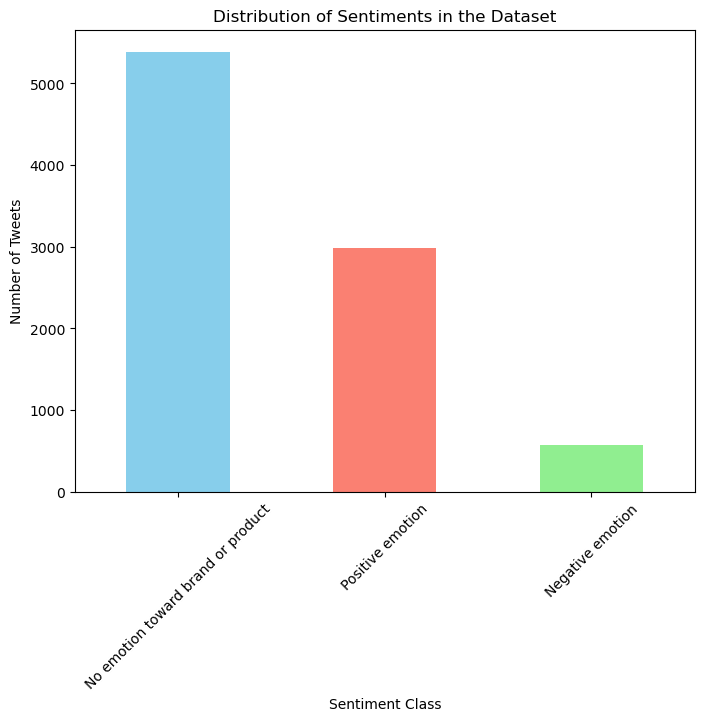

In [15]:
# Plotting the value counts of the three sentiment classes
plt.figure(figsize=(8, 6))
df_multi['sentiment'].value_counts().plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Distribution of Sentiments in the Dataset')
plt.xlabel('Sentiment Class')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.show()

### comparison of binary models

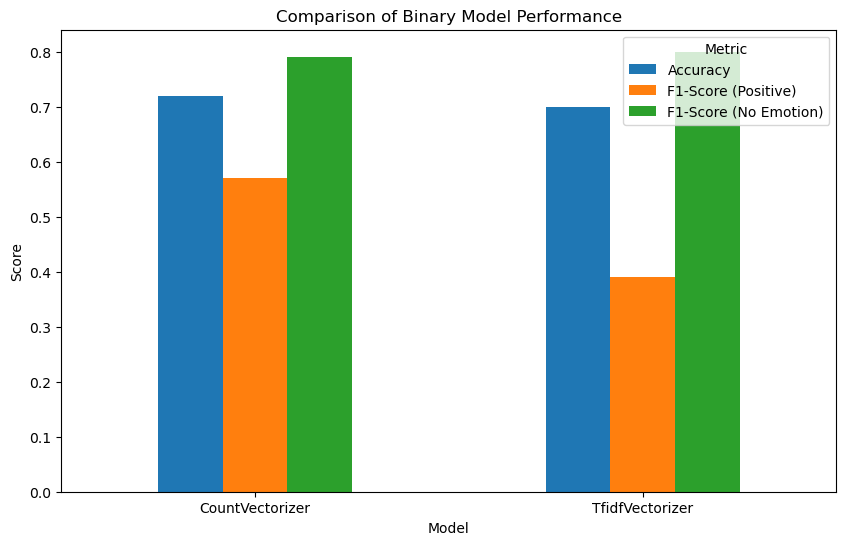

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Data from our previous evaluation reports
data = {
    'Model': ['CountVectorizer', 'TfidfVectorizer'],
    'Accuracy': [0.72, 0.70],
    'F1-Score (Positive)': [0.57, 0.39],
    'F1-Score (No Emotion)': [0.79, 0.80]
}
comparison_df = pd.DataFrame(data)
comparison_df.set_index('Model', inplace=True)

# Plotting the comparison
fig, ax = plt.subplots(figsize=(10, 6))
comparison_df[['Accuracy', 'F1-Score (Positive)', 'F1-Score (No Emotion)']].plot(kind='bar', ax=ax)
ax.set_title('Comparison of Binary Model Performance')
ax.set_ylabel('Score')
ax.tick_params(axis='x', rotation=0)
ax.legend(title='Metric')
plt.show()

### Initial sentiment Distribution

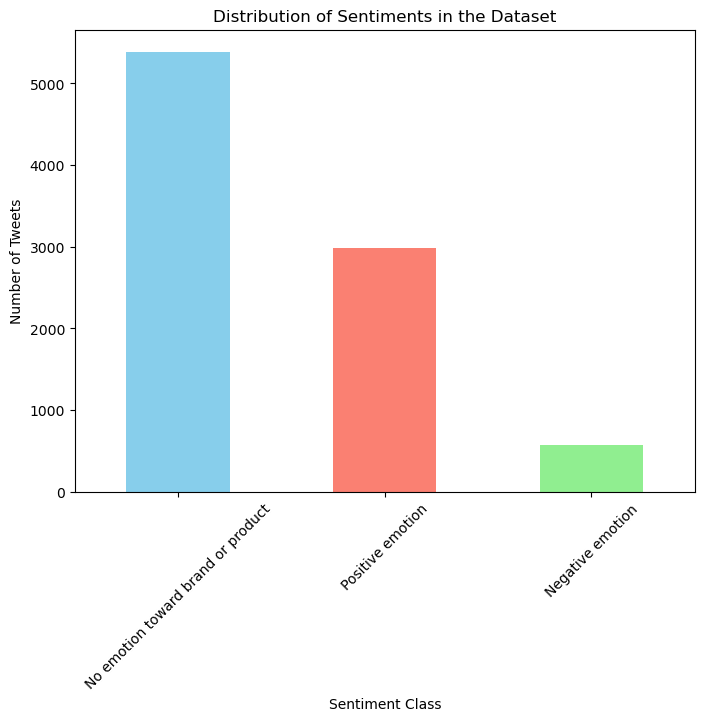

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset to get the full distribution
df_full = pd.read_csv('data/judge_tweet_product_company.csv', encoding='latin-1')

# Filter for the relevant classes
df_full = df_full[df_full['is_there_an_emotion_directed_at_a_brand_or_product'].isin([
    'Positive emotion',
    'Negative emotion',
    'No emotion toward brand or product'
])]

# Plotting the value counts
plt.figure(figsize=(8, 6))
df_full['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts().plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Distribution of Sentiments in the Dataset')
plt.xlabel('Sentiment Class')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.show()

### Work cloud for each sentiment

In [18]:
!pip install wordcloud

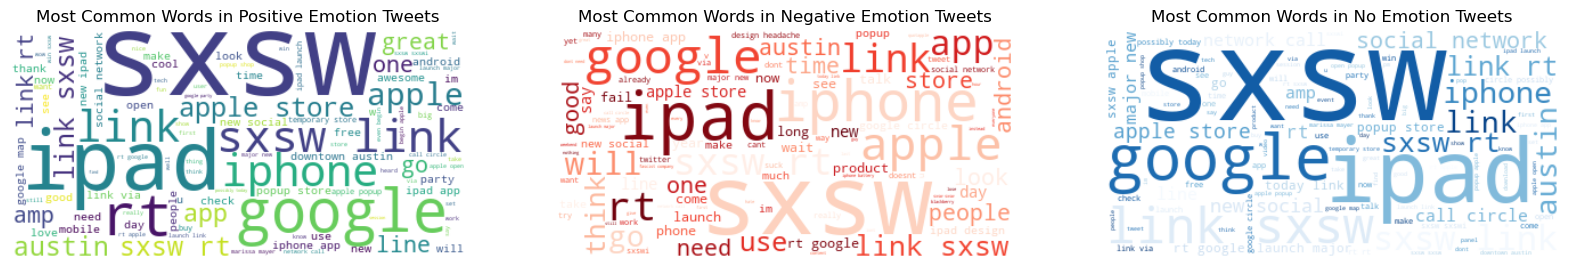

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all the text for each sentiment category
positive_text = " ".join(review for review in df_multi[df_multi['sentiment'] == 'Positive emotion'].lemmatized_text)
negative_text = " ".join(review for review in df_multi[df_multi['sentiment'] == 'Negative emotion'].lemmatized_text)
no_emotion_text = " ".join(review for review in df_multi[df_multi['sentiment'] == 'No emotion toward brand or product'].lemmatized_text)

# Create and generate a word cloud for each sentiment
wordcloud_positive = WordCloud(background_color="white", max_words=100, colormap='viridis').generate(positive_text)
wordcloud_negative = WordCloud(background_color="white", max_words=100, colormap='Reds').generate(negative_text)
wordcloud_no_emotion = WordCloud(background_color="white", max_words=100, colormap='Blues').generate(no_emotion_text)

# Display the generated images
plt.figure(figsize=(20, 10))

# Positive Word Cloud
plt.subplot(1, 3, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Most Common Words in Positive Emotion Tweets')
plt.axis('off')

# Negative Word Cloud
plt.subplot(1, 3, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Most Common Words in Negative Emotion Tweets')
plt.axis('off')

# No Emotion Word Cloud
plt.subplot(1, 3, 3)
plt.imshow(wordcloud_no_emotion, interpolation='bilinear')
plt.title('Most Common Words in No Emotion Tweets')
plt.axis('off')

plt.show()

### Save the model and vectorizer

In [20]:
import pickle

# Define the file paths where we will save the model and vectorizer
model_filename = 'final_sentiment_model.pkl'
vectorizer_filename = 'final_vectorizer.pkl'

# Save the final multi-class model
with open(model_filename, 'wb') as file:
    pickle.dump(multi_model, file)
    
# Save the final multi-class vectorizer
with open(vectorizer_filename, 'wb') as file:
    pickle.dump(multi_vectorizer, file)

print(f"Model saved to {model_filename}")
print(f"Vectorizer saved to {vectorizer_filename}")

Model saved to final_sentiment_model.pkl
Vectorizer saved to final_vectorizer.pkl
